# Histogram fitting

## Example 01

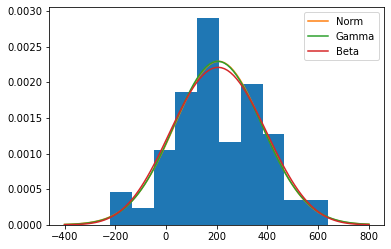

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# 產生隨機的事件
# np.random.rand() 產生 0~1 之間的隨機數
# np.random.normal(mu, sigma, N)
y = 50 * np.random.rand() * np.random.normal(10, 10, 100) + 20

# plot normed histogram
# plt.hist(y, normed=True) # normed 是舊的方式，新的要改用 density
plt.hist(y, density=True)

# 找 xticks 最大跟最小值, 這樣才知道分布的範圍
xt = plt.xticks()[0]
xmin, xmax = min(xt), max(xt)
lnspc = np.linspace(xmin, xmax, len(y)) # np.linspace(起點, 終點, 包含起點到終點共幾個點)

# normal distribution
m, s = stats.norm.fit(y) # mean, std
pdf_g = stats.norm.pdf(lnspc, m, s) # 用 fit 到的參數求出的函數值，lnspc 就是 x 的值組成的 list
plt.plot(lnspc, pdf_g, label='Norm') # 畫出 fit 到的曲線

# gamma distribution
ag, bg, cg = stats.gamma.fit(y)
pdf_gamma = stats.gamma.pdf(lnspc, ag, bg, cg)
plt.plot(lnspc, pdf_gamma, label='Gamma')

# beta distribution
ab, bb, cb, db = stats.beta.fit(y)
pdf_beta = stats.beta.pdf(lnspc, ab, bb, cb, db)
plt.plot(lnspc, pdf_beta, label='Beta')

plt.legend()
plt.show()

## Example 02

In [2]:
# 1. import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 2. Define the fit function
def fit_func(x, A, beta, B, mu, sigma):
    return (A * np.exp(-x / beta) + B * np.exp(-1. * (x - mu)**2 / (2 * sigma**2)))

# 3. Get the data for fitting
# 用來 fitting 的數據可以是從實驗得到的，或是模擬產生的
# 這邊用模擬產生數據

# background
data = np.random.exponential(scale=2.0, size=100000)
# signal

data2 = np.random.normal(loc=3.0, scale=0.3, size=15000) # mu=3.0 sigma=0.3
bins = np.linspace(0, 6, 61) # 0 ~ 6 之間產生 61 個點，包含 0 與 6

# 得到 signal 和 background 的 histogram
# data_entries 是每個 bin 的高度 (就是 y)
# bins 是每個 bin 的數值 (就是 x)
data_entries_1, bins_1 = np.histogram(data, bins=bins)
data_entries_2, bins_2 = np.histogram(data2, bins=bins)

# 把 signal 和 background 的 histogram 加起來
data_entries = data_entries_1 + data_entries_2

# 計算 bin 的中心值, fitting 時的 x 值用這個帶入
bins_centers = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])

# 4. Fit the function to the histogram
# fitting function 用名字傳入
# 把要 fit 的 x, y 值都傳入
# 初始的參數值也可以傳入
# fitting 後傳回參數列表 (popt) 和 covariance matrix (pcov)
# covariance matrix 對角線元素表示 fitted 參數的 variance
popt, pcov = curve_fit(fit_func, xdata=bins_centers, ydata=data_entries, p0=[20000, 2.0, 2000, 3.0, 0.3])

print(popt)
print(pcov)

[4.96421244e+03 2.02029225e+00 2.00715865e+03 3.00551512e+00
 2.93053332e-01]
[[ 5.64033912e+02 -2.87789215e-01  8.27618618e+01  3.20082965e-03
   2.04332376e-02]
 [-2.87789215e-01  2.87849464e-04 -1.25513515e-01  5.77816457e-07
  -3.40128191e-05]
 [ 8.27618618e+01 -1.25513515e-01  7.96419595e+02 -8.36217583e-04
  -5.46211588e-02]
 [ 3.20082965e-03  5.77816457e-07 -8.36217583e-04  2.09464224e-05
  -2.53883644e-07]
 [ 2.04332376e-02 -3.40128191e-05 -5.46211588e-02 -2.53883644e-07
   2.55793048e-05]]


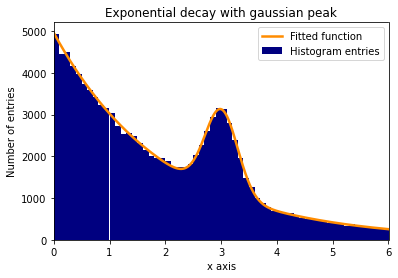

<Figure size 432x288 with 0 Axes>

In [3]:
# 5. 把 fitting 的結果和 histogram 疊圖
xspace = np.linspace(0, 6, 100000) # 產生很多點, 畫圖時比較 smooth

# 畫圖
plt.bar(bins_centers, data_entries, width=bins[1] - bins[0], color='navy', label=r'Histogram entries')
plt.plot(xspace, fit_func(xspace, *popt), color='darkorange', linewidth=2.5, label=r'Fitted function')

plt.xlim(0, 6)
plt.xlabel(r'x axis')
plt.ylabel(r'Number of entries')
plt.title(r'Exponential decay with gaussian peak')
plt.legend(loc='best')
plt.show()
plt.clf()

## Example 03

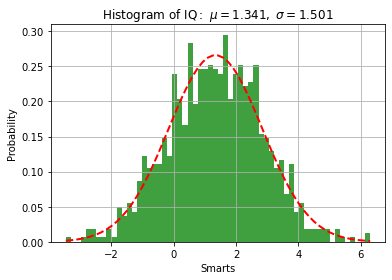

In [4]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

# 產生數據
y = np.random.normal(1.35, 1.43, 1000) # mu=1.35, sigma=1.43, N=1000

# fit data
(mu, sigma) = norm.fit(y)

# histogram
# n, bins, patches = plt.hist(y, 60, normed=True, facecolor='green', alpha=0.75) # normed 過時了, 要用 density
n, bins, patches = plt.hist(y, 60, density=True, facecolor='green', alpha=0.75)
# n 是 histogram 每個 bin 的高度
# bins 是每個 bin 的值

# 用 fit 到的參數來畫出理論的曲線
pdf_fitted = norm.pdf(bins, mu, sigma)
plt.plot(bins, pdf_fitted, 'r--', linewidth=2)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.3f,\ \sigma=%.3f$' % (mu, sigma))
plt.grid(True)

plt.show()

## Example 04

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]
[4.29951449 6.14320859 4.67473676 4.99396908 4.68754508 5.66949763
 3.14230797 6.82216655 6.48607087 5.43996083 4.59088528 4.0695538
 5.62448475 4.91490405 5.2404609  4.9275067  4.53313781 4.63340679
 4.78112759 5.66317737 5.06772428 3.92303369 5.33573761 6.19095276
 5.48394638 4.23785111 5.83522765 5.26381201 4.95613613 4.64425309
 3.05402062 4.82791064 5.04718613 5.15838863 6.80866232 4.07807452
 4.42206527 4.73474669 4.97813447 5.44018445 5.06379219 4.52650326
 5.21999523 4.9882

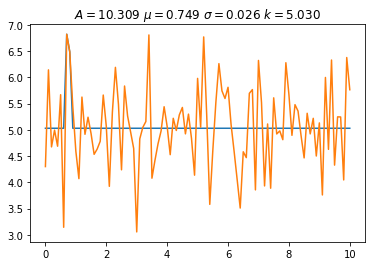

In [5]:
from pylab import *
from numpy import loadtxt
from scipy.optimize import leastsq

fit_func = lambda p, x: p[0] * exp(-0.5*((x - p[1])/p[2])**2) + p[3]
err_func = lambda p, x, y: (y - fit_func(p, x))

# filename = 'gaussdata.csv'
# data = loadtxt(filename, skiprows=1, delimiter=',')
# xdata = data[:, 0]
# ydata = data[:, 1]
xdata = np.linspace(0, 10, 101)
ydata = np.random.normal(5, 0.8, len(xdata))
print(xdata)
print(ydata)

init = [1.0, 0.5, 0.5, 0.5]

out = leastsq(err_func, init, args=(xdata, ydata))
c = out[0]

print('A exp[-0.5((x-mu)/sigma)^2] + k')
print('Parent Coefficients:')
print('1.000, 0.200, 0.300, 0.625')
print('Fit Coefficients:')
print(c[0], c[1], abs(c[2]), c[3])

plot(xdata, fit_func(c, xdata), label='fit func')
plot(xdata, ydata, label='data')

title(r'$A = %.3f\ \mu = %.3f\ \sigma = %.3f\ k = %.3f $' % (c[0], c[1], abs(c[2]), c[3]))

show()

## Example 05

/usr/local/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


(27.82553918401895, -155.05013576289645, 5283.8110062136075)


/usr/local/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


(6.250036884787301, 2.0796122985252863, -0.9622337848471889, 48.18699280329216)
(-0.3325885728009961, 47.332588572801)


/usr/local/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:496: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))


(38.432731827802236, -175.7624748658561, 214.07103785563305)
(0.37785152719403214, 47.00000000000001, 1.4244653683995792)
(3.999949918400399, 13.372233634428667)


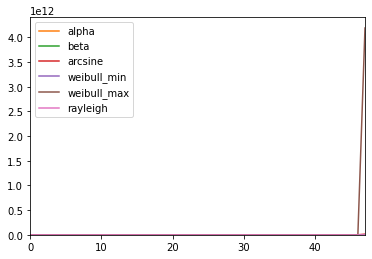

In [6]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats # import scipy 時不會包含 stats，所以還要自己 import 進來

size = 20000
# x = scipy.arange(size) # scipy.arange is deprecated
x = np.arange(size)
# 用 beta distribution 產生 y 值
# y = scipy.int_(scipy.round_(scipy.stats.beta.rvs(6, 2, size=size) * 47)) # scipy.round_ is deprecated
y = scipy.int_(np.round_(scipy.stats.beta.rvs(6, 2, size=size) * 47))
# creating the histogram
h = plt.hist(y, bins=range(48))

dist_names = ['alpha', 'beta', 'arcsine', 'weibull_min', 'weibull_max', 'rayleigh']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name) # 傳回 scipy.stats.dist_name 的屬性 dist_name 必須要是 string
    param = dist.fit(y)
    print(param)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size # pdf 畫的是 normalized 的，所以要乘上 size 變成原本的大小
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0, 47)

plt.legend(loc='upper left')
plt.show()

## Example 06

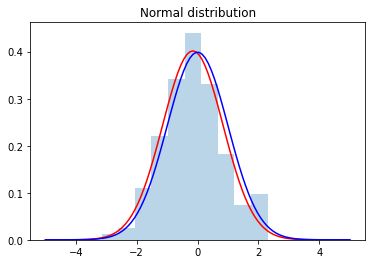

In [7]:
from scipy.stats import norm
from numpy import linspace
from pylab import plot, show, hist, figure, title

# 依照 normal distribution 產生 150 個數據點
# mean=0, standard deviation=1
sample = norm.rvs(loc=0, scale=1, size=150)

# fitting
param = norm.fit(sample)
# mu = param[0], sigma = param[1]

x = linspace(-5, 5, 100) # -5 到 5 產生 100 個點，包含 -5 和 5
# fitted distribution
pdf_fitted = norm.pdf(x, loc=param[0], scale=param[1])
# original distribution
pdf = norm.pdf(x)

title('Normal distribution')
plot(x, pdf_fitted, 'r-', x, pdf, 'b-')
# hist(sample, normed=1, alpha=.3)
hist(sample, density=1, alpha=.3)

show()

## Example 07

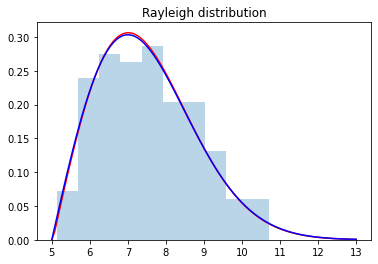

In [8]:
from scipy.stats import norm, rayleigh
from numpy import linspace
from pylab import plot, show, hist, figure, title

# 依照 rayleigh 分布產生數據
y = rayleigh.rvs(loc=5, scale=2, size=150)
# fitting
param = rayleigh.fit(y)
# 畫圖
x = linspace(5, 13, 100)
# fitted distribution
pdf_fitted = rayleigh.pdf(x, loc=param[0], scale=param[1])
# original distribution
pdf = rayleigh.pdf(x, loc=5, scale=2)

title('Rayleigh distribution')
plot(x, pdf_fitted, 'r-', x, pdf, 'b-')
# hist(y, normed=1, alpha=.3)
hist(y, density=1, alpha=.3)
show()

## Example 08

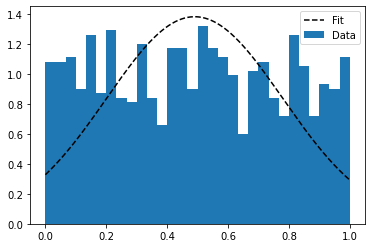

In [9]:
import numpy as np
from matplotlib import pyplot as plt

N = 1000
data = np.random.rand(N) # 0~1 之間產生 N 個隨機數

avg = np.mean(data)
var = np.var(data)

pdf_x = np.linspace(np.min(data), np.max(data), 1000)
pdf_y = 1.0 / np.sqrt(2 * np.pi * var) * np.exp(-0.5 * (pdf_x - avg)**2 / var) # 用 x 值帶入 gaussian function 求 y，所以這不算 fitting

plt.figure()
# plt.hist(data, 30, normed=True)
plt.hist(data, 30, density=True)
plt.plot(pdf_x, pdf_y, 'k--')
plt.legend(['Fit', 'Data'], loc='best')
plt.show()

## Example 09

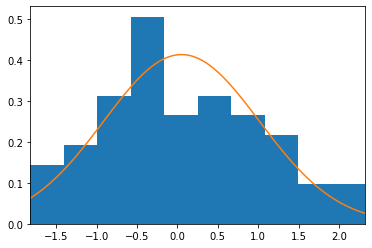

In [10]:
import matplotlib.pyplot as plt
import numpy as np
# import matplotlib.mlab as mlab
from scipy import stats

arr = np.random.randn(100)

plt.figure(1)
# plt.hist(arr, normed=True)
plt.hist(arr, density=True)
plt.xlim((min(arr), max(arr)))

mean = np.mean(arr)
variance = np.var(arr)
sigma = np.sqrt(variance)

x = np.linspace(min(arr), max(arr), 100)

# plt.plot(x, mlab.normpdf(x, mean, sigma)) # AttributeError: module 'matplotlib.mlab' has no attribute 'normpdf'
plt.plot(x, stats.norm.pdf(x, mean, sigma))
plt.show()



## Example 10

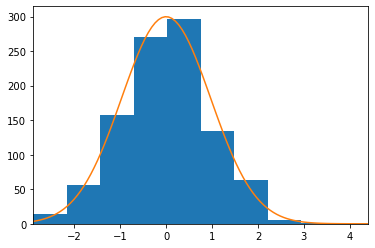

In [11]:
import matplotlib.pyplot as plt
import numpy as np
# import matplotlib.mlab as mlab
from scipy import stats

arr = np.random.randn(1000)

plt.figure(1)
result = plt.hist(arr) # result 包含了 entities, bins, patches
plt.xlim(min(arr), max(arr))

mean = np.mean(arr)
variance = np.var(arr)
sigma = np.sqrt(variance)

x = np.linspace(min(arr), max(arr), 100)
dx = result[1][1] - result[1][0] # result[1] 就是 bins
scale = len(arr) * dx # arr 的元素數目是固定的，當填入 histogram 時 dx 越大 bar 就越高
# plt.plot(x, mlab.normpdf(x, mean, sigma) * scale) # 乘以 scale 相當於乘以面積 # AttributeError: module 'matplotlib.mlab' has no attribute 'normpdf'
plt.plot(x, stats.norm.pdf(x, mean, sigma) * scale) # 乘以 scale 相當於乘以面積

plt.show()

## Example 11

<class 'numpy.ndarray'>


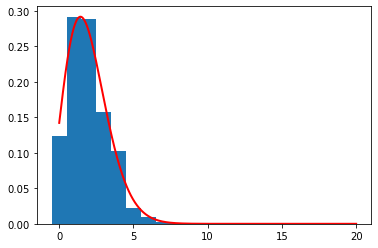

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# from scipy.misc import factorial # ImportError: cannot import name 'factorial'
from scipy.special import factorial

# get poisson deviated random numbers
data = np.random.poisson(2, 1000)
print(type(data))

# the bins should be of integer width, because poisson is an integer distribution
# entries, bin_edges, patches = plt.hist(data, bins=11, range=[-0.5, 10.5], normed=True)
entries, bin_edges, patches = plt.hist(data, bins=11, range=[-0.5, 10.5], density=True)

# calculate binmiddles
bin_middles = 0.5*(bin_edges[1:] + bin_edges[:-1]) # 計算 bin 的中心值，當成 x 值

# poisson function, parameter lamb is the fit parameter
def poisson(k, lamb):
    return (lamb**k/factorial(k)) * np.exp(-lamb)

# fit with curve_fit
parameters, cov_matrix = curve_fit(poisson, bin_middles, entries) # curve_fit(要用來 fitting 的函數, x 值, y 值)

# plot poisson-deviation with fitted parameter
x_plot = np.linspace(0, 20, 1000)

plt.plot(x_plot, poisson(x_plot, *parameters), 'r-', lw=2)
plt.show()

## Example 12

/usr/local/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


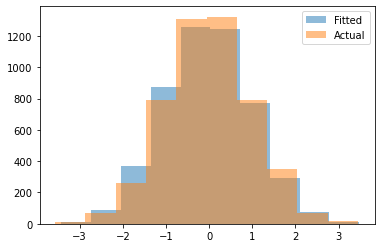

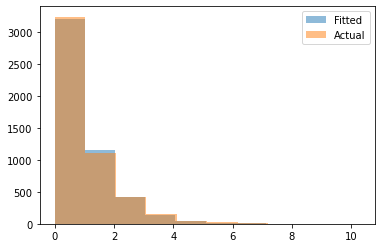

In [13]:
import scipy
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt

class Distribution(object):
    def __init__(self, dist_names_list = []):
        self.dist_names = ['norm', 'lognorm', 'expon', 'pareto']
        self.dist_results = []
        self.params = {}

        self.DistributionName = ""
        self.PValue = 0
        self.Param = None

        self.isFitted = False

    def Fit(self, y):
        self.dis_results = []
        self.params = {}
        for dist_name in self.dist_names:
            dist = getattr(scipy.stats, dist_name)
            param = dist.fit(y)

            self.params[dist_name] = param
            # Applying the Kolmogorov-Smirnov test
            D, p = scipy.stats.kstest(y, dist_name, args=param)
            self.dist_results.append((dist_name, p))

        # select the best fitted distribution
        # 這邊選出最合適的分佈函數 (i.e. P-value 最大)
        # 但是不代表這個分佈函數 fit 出來的結果是最好的
        sel_dist, p = (max(self.dist_results, key=lambda item: item[1]))
        # store the name of the best fit and its p-value
        self.DistributionName = sel_dist
        self.PValue = p

        self.isFitted = True
        return self.DistributionName, self.PValue

    def Random(self, n = 1):
        if self.isFitted:
            dist_name = self.DistributionName
            param = self.params[dist_name]
            # initiate the scipy distribution
            dist = getattr(scipy.stats, dist_name)
            return dist.rvs(*param[:-2], loc=param[-2], scale=param[-1], size=n)
        else:
            raise ValueError('Must first run the Fit method.')

    def Plot(self, y):
        x = self.Random(n=len(y))
        plt.hist(x, alpha=0.5, label='Fitted')
        plt.hist(y, alpha=0.5, label='Actual')
        plt.legend(loc='upper right')
        plt.show()

# Generate random numbers from a normal distribution
# , fit a distribution and plot a histogram
from scipy.stats import norm
r = norm.rvs(size=5000)

dst = Distribution()
dst.Fit(r)
dst.Plot(r)

# Fit an exponential distribution
from scipy.stats import expon
r = expon.rvs(size=5000) # exponential

dst = Distribution()
dst.Fit(r)
dst.Plot(r)

## Example 13: SciPy skewnormal fitting

5.364810230740565 -0.10962189647248596 2.2292596595179464


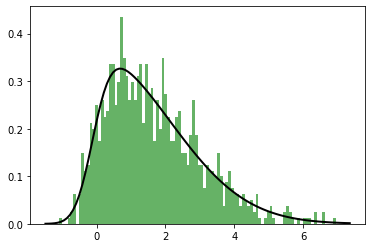

In [14]:
# https://stackoverflow.com/questions/50140371/scipy-skewnormal-fitting

from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

# choose some parameters
a, loc, scale = 5.3, -0.1, 2.2

# draw a sample
data = stats.skewnorm(a, loc, scale).rvs(1000) # 產生 1000 個 skew normal 的隨機數

# estimate parameters from sample
ae, loce, scalee = stats.skewnorm.fit(data)
print(ae, loce, scalee)

# plot the pdf
plt.figure()
plt.hist(data, bins=100, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = stats.skewnorm.pdf(x, ae, loce, scalee)
plt.plot(x, y, 'k', linewidth=2)
plt.show()